##Data importing and overwiev

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from google.colab import drive
drive.mount("/content/drive")
%cd /content/drive/MyDrive/DA

countries = pd.read_csv("countries.csv")
events = pd.read_csv("events.csv")
products = pd.read_csv("products.csv")

Mounted at /content/drive
/content/drive/MyDrive/DA


In [2]:
def overview(df, name):
    print(f"\n=== {name} ===")
    print("First 5 rows:")
    print(df.head())
    print("\nInformation:")
    df.info()
    print("\nMissing values:")
    print(df.isnull().sum())
    print("\nDuplicates:", df.duplicated().sum())

for name, df in [("Countries", countries), ("Events", events), ("Products", products)]:
    overview(df, name)


=== Countries ===
First 5 rows:
             name alpha-2 alpha-3   region       sub-region
0     Afghanistan      AF     AFG     Asia    Southern Asia
1   Åland Islands      AX     ALA   Europe  Northern Europe
2         Albania      AL     ALB   Europe  Southern Europe
3         Algeria      DZ     DZA   Africa  Northern Africa
4  American Samoa      AS     ASM  Oceania        Polynesia

Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        249 non-null    object
 1   alpha-2     248 non-null    object
 2   alpha-3     249 non-null    object
 3   region      248 non-null    object
 4   sub-region  248 non-null    object
dtypes: object(5)
memory usage: 9.9+ KB

Missing values:
name          0
alpha-2       1
alpha-3       0
region        1
sub-region    1
dtype: int64

Duplicates: 0

=== Events ===
First 5 rows:
    Order ID O

1. After first reviewing the datasets, missing values ​were presented ​in the tables: *Countries and Events*.
2. No duplicates were found.
3. Some data is recognized incorrectly in such columns as Order Date, Ship Date in table *Events*.

In [3]:
def overview(df, name):
    print(f"\n {name}")
    print("\nMissing values:")
    print(df.isnull().sum() / df.shape[0])
    print("\nPercent of missing values:", df.duplicated().sum() / df.shape[0])

for name, df in [("Countries", countries), ("Events", events), ("Products", products)]:
    overview(df, name)


 Countries

Missing values:
name          0.000000
alpha-2       0.004016
alpha-3       0.000000
region        0.004016
sub-region    0.004016
dtype: float64

Percent of missing values: 0.0

 Events

Missing values:
Order ID          0.000000
Order Date        0.000000
Ship Date         0.000000
Order Priority    0.000000
Country Code      0.061654
Product ID        0.000000
Sales Channel     0.000000
Units Sold        0.001504
Unit Price        0.000000
Unit Cost         0.000000
dtype: float64

Percent of missing values: 0.0

 Products

Missing values:
id           0.0
item_type    0.0
dtype: float64

Percent of missing values: 0.0


Checking the percentage of missing values to whole.


In [4]:
countries.dropna(inplace=True)
events.dropna(inplace=True)
print(events.isna().sum())

Order ID          0
Order Date        0
Ship Date         0
Order Priority    0
Country Code      0
Product ID        0
Sales Channel     0
Units Sold        0
Unit Price        0
Unit Cost         0
dtype: int64


Deleting missing rows in datasets *Countries* and *Events*.

In [5]:
events.describe()

,Order ID,Product ID,Units Sold,Unit Price,Unit Cost
count,1.246000e+03,1246.000000,1246.000000,1246.000000,1246.000000
mean,5.432231e+08,5756.146067,4953.186998,264.203387,186.310088
std,2.573524e+08,2827.558739,2915.825155,216.592937,175.503652
min,1.006406e+08,1270.000000,2.000000,9.330000,6.920000
25%,3.237987e+08,2455.000000,2349.250000,81.730000,35.840000
50%,5.438407e+08,5988.000000,4980.000000,154.060000,97.440000
75%,7.539619e+08,8293.000000,7477.000000,433.372500,263.330000
max,9.998797e+08,8969.000000,9999.000000,668.270000,524.960000


Significant variation in the number of units sold per order: The maximum number of units sold is significantly higher than the average. This may indicate bulk orders or data errors.

Significant differences in price and cost: The maximum price and cost are significantly higher than the average values. This may be due to the sale of expensive goods or errors in pricing.

##Data Analysis and Visualisation

In [6]:
#Correcting the columns names
def changing_columns(df):
    df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

changing_columns(products)
changing_columns(events)
changing_columns(countries)

print("Columns in Events:", events.columns)
print("Columns in Products:", products.columns)

Columns in Events: Index(['order_id', 'order_date', 'ship_date', 'order_priority', 'country_code',
       'product_id', 'sales_channel', 'units_sold', 'unit_price', 'unit_cost'],
      dtype='object')
Columns in Products: Index(['id', 'item_type'], dtype='object')


In [8]:
sales_channels = events['sales_channel'].unique()
events['sales_channel'] = events['sales_channel'].replace({'online': 'Online', 'offline': 'Offline'})
print(sales_channels)

['Online' 'Offline' 'online']


In [7]:
#Columns renaming
countries.rename(columns={'alpha-3': 'country_code'}, inplace=True)
countries.rename(columns={'name': 'country_name'}, inplace=True)
countries.head()
products.rename(columns={'id': 'product_id'}, inplace=True)
products.head()

,product_id,item_type
0,2103,Cereal
1,7940,Household
2,2455,Clothes
3,1270,Beverages
4,8681,Office Supplies


Renaming column alpha-3 with country_code and column "id" to "product_id" in order to connect all 3 tables in one dataset. Alpha-3 is matching with data in column country_code from dataset *Events*.

In [9]:
#Connecting all 3 datasets in one
merged_df1 = pd.merge(events, countries, on='country_code', how='left')
merged_df = pd.merge(merged_df1, products, on="product_id", how='left')
print(merged_df.head())

    order_id order_date   ship_date order_priority country_code  product_id  \
0  100640618  10/8/2014  10/18/2014              M          NOR        2103   
1  100983083  8/11/2016   8/11/2016              C          SRB        2103   
2  102230632  5/13/2017   6/13/2017              L          MNE        2455   
3  103435266  8/11/2012   9/18/2012              H          SRB        1270   
4  103450715  3/15/2015   4/18/2015              H          SVK        8681   

  sales_channel  units_sold  unit_price  unit_cost country_name alpha-2  \
0        Online       650.0      205.70     117.11       Norway      NO   
1       Offline      1993.0      205.70     117.11       Serbia      RS   
2        Online      1171.0      109.28      35.84   Montenegro      ME   
3       Offline      7648.0       47.45      31.79       Serbia      RS   
4        Online      2220.0      651.21     524.96     Slovakia      SK   

   region       sub-region        item_type  
0  Europe  Northern Europe  

In [10]:
#Changing format to datetime
merged_df['ship_date'] = pd.to_datetime(merged_df['ship_date'])
merged_df['order_date'] = pd.to_datetime(merged_df['order_date'])

#Calculating revenue and profit
merged_df['revenue'] = merged_df['unit_price'] * merged_df['units_sold']
merged_df['profit'] = (merged_df['unit_price'] - merged_df['unit_cost']) * merged_df['units_sold']

#Finding tatal information regarding bussiness
total_number_of_orders = merged_df['order_id'].nunique()
tatal_countries = merged_df['country_name'].nunique()
total_profit = merged_df['profit'].sum()
total_quantity_of_sold_items = merged_df['units_sold'].sum()

print("Total number of orders:", total_number_of_orders)
print("Total number of countries:", tatal_countries)
print("Total profit:", total_profit)
print("Total quantity of sold items:", total_quantity_of_sold_items)

Total number of orders: 1246
Total number of countries: 45
Total profit: 473709035.06
Total quantity of sold items: 6171671.0


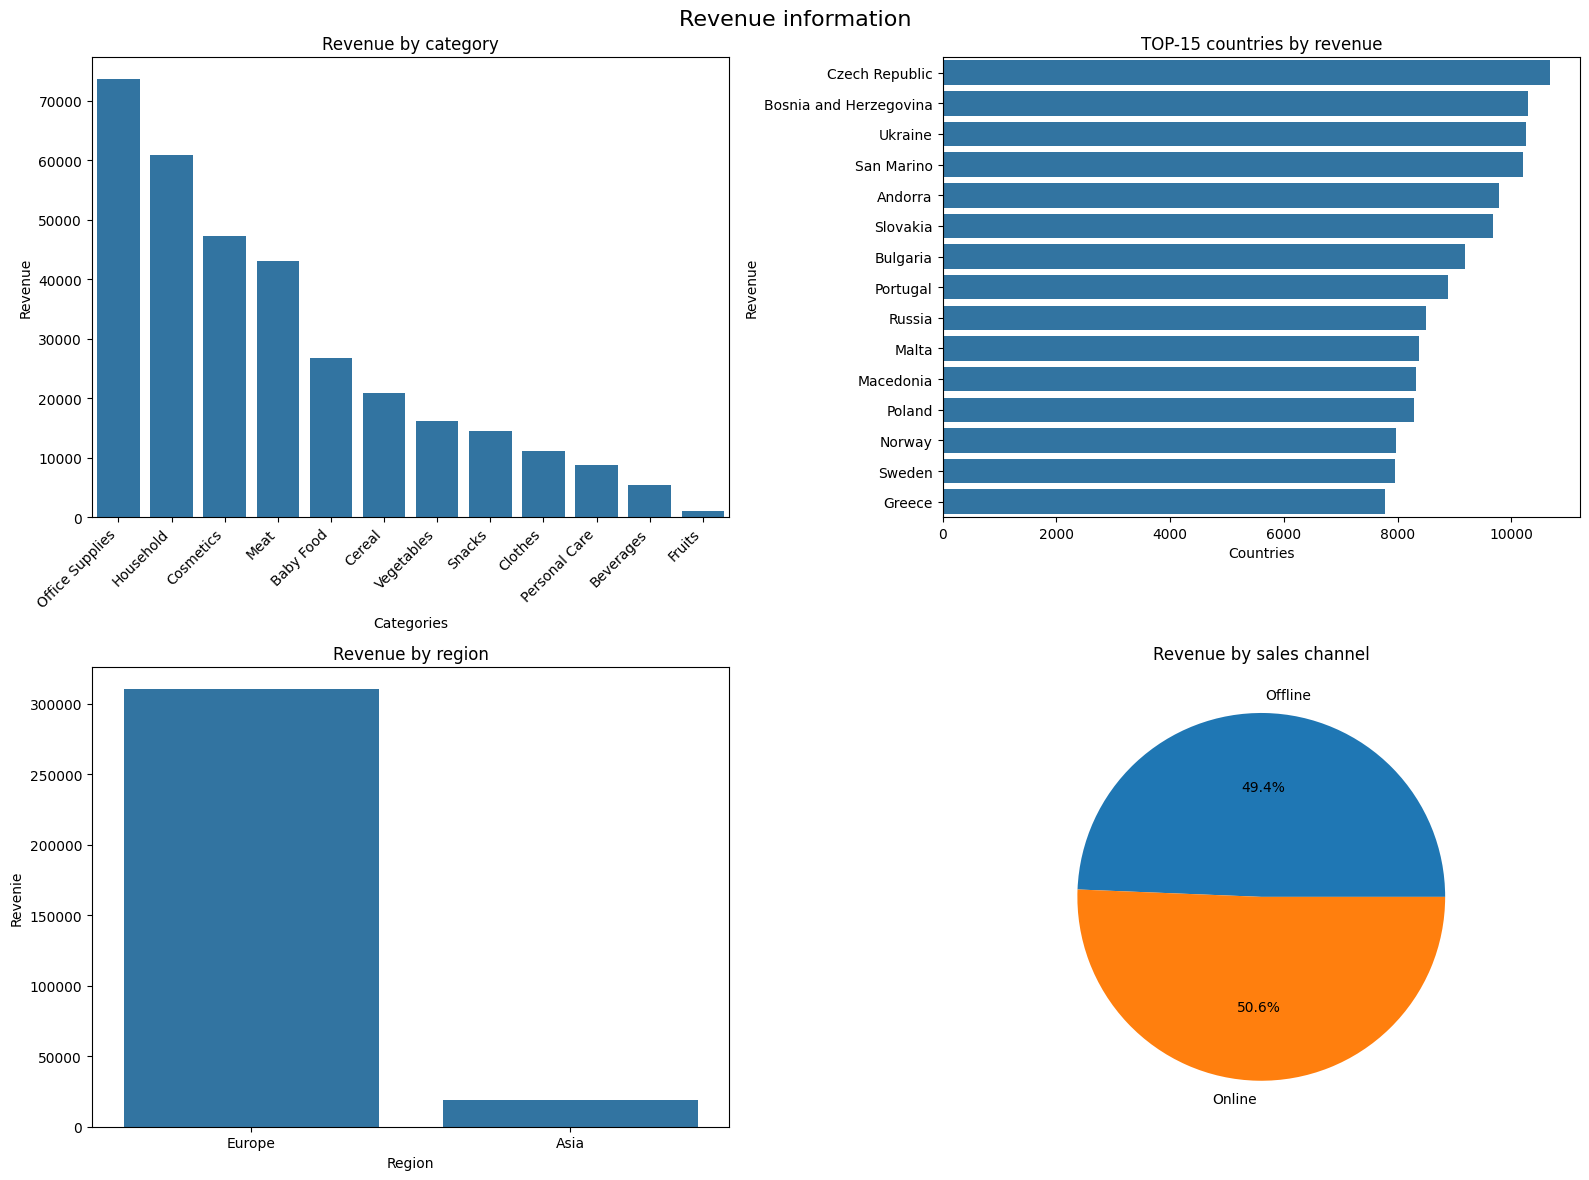

In [11]:
# Info for revenue graphics
revenue_by_category = merged_df.groupby('item_type')['unit_price'].sum().sort_values(ascending=False)
revenue_by_country = merged_df.groupby('country_name')['unit_price'].sum().sort_values(ascending=False).head(15)
revenue_by_region = merged_df.groupby('region')['unit_price'].sum().sort_values(ascending=False)
revenue_by_channel = merged_df.groupby('sales_channel')['unit_price'].sum()


fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle("Revenue information", fontsize=16)

# Revenue by categories
sns.barplot(ax=axes[0, 0], x=revenue_by_category.index, y=revenue_by_category.values)
axes[0, 0].set_title("Revenue by category")
axes[0, 0].set_xlabel("Categories")
axes[0, 0].set_ylabel("Revenue")
xticks = axes[0, 0].get_xticks()
# Set tick locations and labels
axes[0, 0].set_xticks(xticks)
axes[0, 0].set_xticklabels(revenue_by_category.index, rotation=45, ha='right')


# Revenue by countries
sns.barplot(ax=axes[0, 1], x=revenue_by_country.values, y=revenue_by_country.index)
axes[0, 1].set_title("TOP-15 countries by revenue")
axes[0, 1].set_xlabel("Countries")
axes[0, 1].set_ylabel("Revenue")


# Revenue by region
sns.barplot(ax=axes[1,0], x=revenue_by_region.index, y=revenue_by_region.values)
axes[1, 0].set_title("Revenue by region")
axes[1, 0].set_xlabel("Region")
axes[1, 0].set_ylabel("Revenie")


# Revenue by sales channels
revenue_by_channel.plot(kind='pie', ax=axes[1, 1], autopct='%1.1f%%')
axes[1, 1].set_title("Revenue by sales channel")
axes[1, 1].set_ylabel("")


plt.tight_layout()
plt.show()


- The most 3 product categories that affect Revenue are *Office Supplies, Househols and Cosmetics*. On the other side are *Fruits* and *Beverages* which revenue is less then 10,000.
- TOP-15 countries with which we are dealing with are shown. First 3 are *Czech Republic, Bosnia and Herzehovina, Ukraine*. Based on this data, we can assume which countries in Eastern Europe bring the most profit. The least income comes from these countries: *Norway, Sweden, Greece*
- Revenue by region show sagnificant difference in data. So, the company is working mainly on *European* market. *Asia* is probably an additional business oportunity
- Revenues from the *sales channel* are almost equal. Offline sales are less on 0.9% then Online.





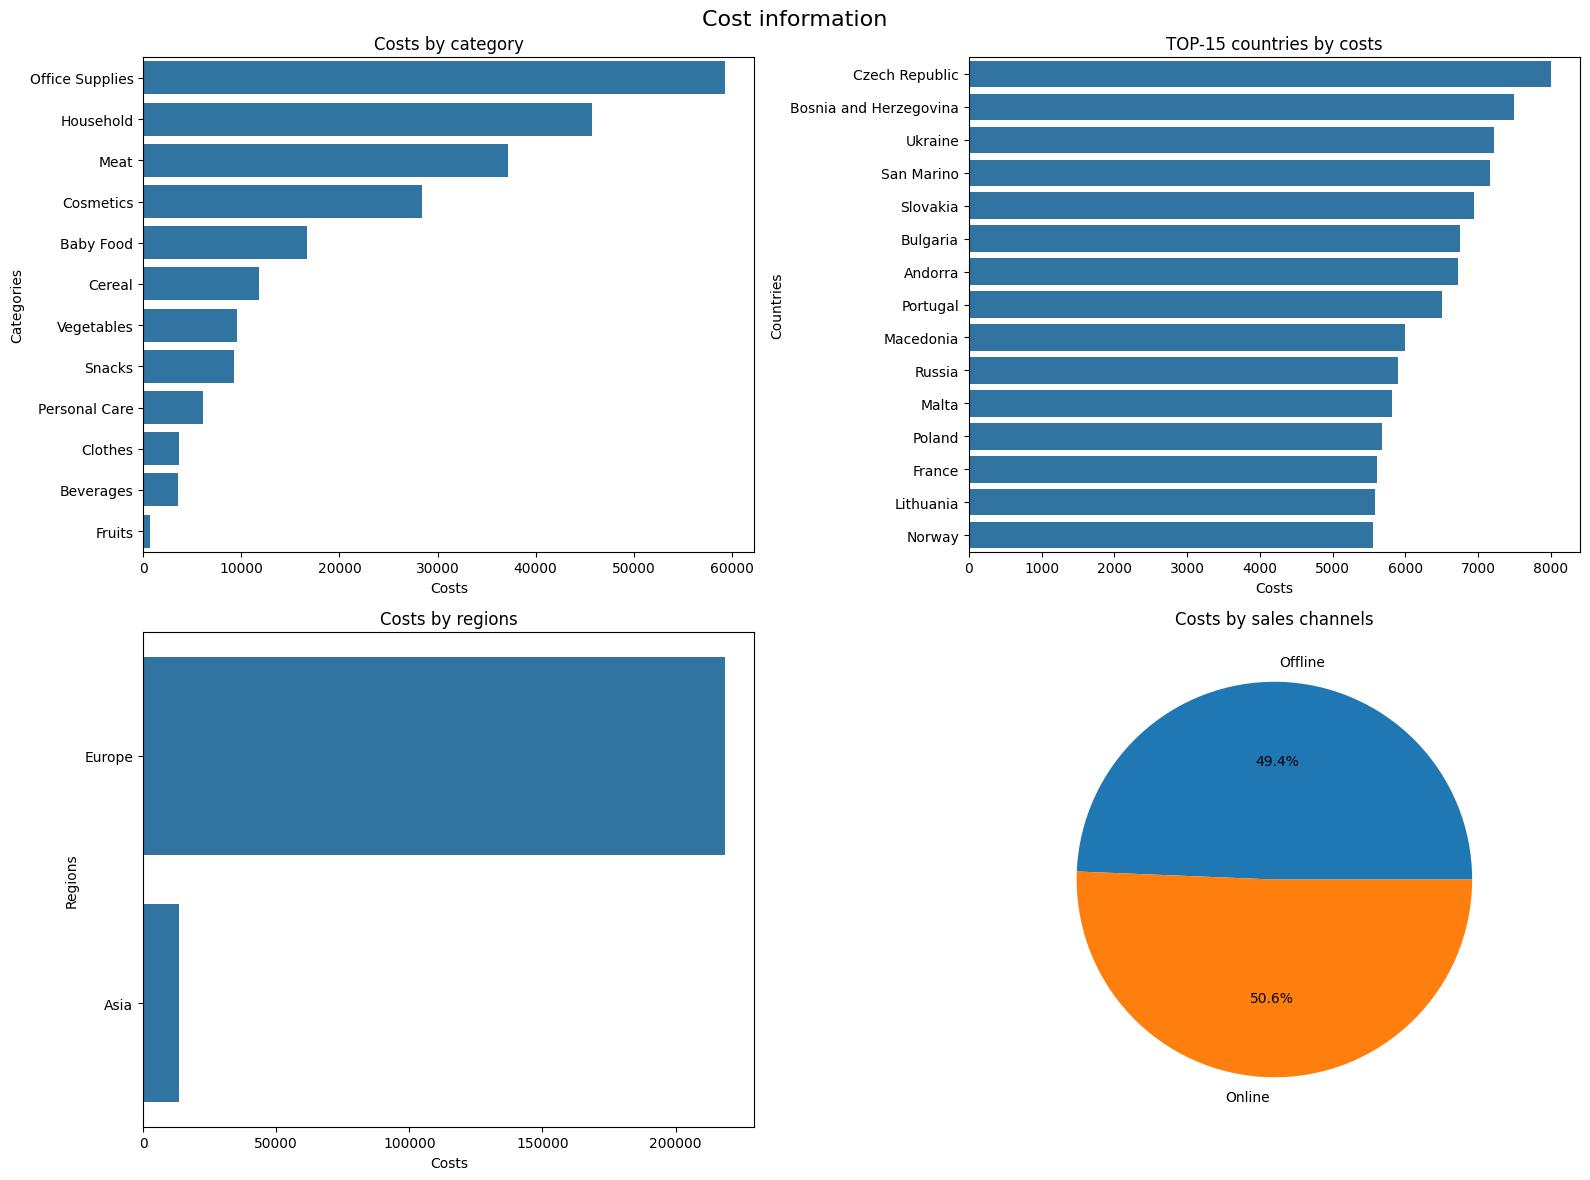

In [12]:
# Info for cost graphics
cost_by_category = merged_df.groupby('item_type')['unit_cost'].sum().sort_values(ascending=False)
cost_by_country = merged_df.groupby('country_name')['unit_cost'].sum().sort_values(ascending=False).head(15)
cost_by_region = merged_df.groupby('region')['unit_cost'].sum().sort_values(ascending=False)
cost_by_channel = merged_df.groupby('sales_channel')['unit_cost'].sum()

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle("Cost information", fontsize=16)

# Costs by category
sns.barplot(ax=axes[0, 0], x=cost_by_category.values, y=cost_by_category.index)
axes[0, 0].set_title("Costs by category")
axes[0, 0].set_xlabel("Costs")
axes[0, 0].set_ylabel("Categories")

# Costs by cauntries
sns.barplot(ax=axes[0, 1], x=cost_by_country.values, y=cost_by_country.index)
axes[0, 1].set_title("TOP-15 countries by costs")
axes[0, 1].set_xlabel("Costs")
axes[0, 1].set_ylabel("Countries")

# Costs by regions
sns.barplot(ax=axes[1, 0], x=cost_by_region.values, y=cost_by_region.index)
axes[1, 0].set_title("Costs by regions")
axes[1, 0].set_xlabel("Costs")
axes[1, 0].set_ylabel("Regions")

# Costs by seles cahnnels
cost_by_channel.plot(kind='pie', ax=axes[1, 1], autopct='%1.1f%%')
axes[1, 1].set_title("Costs by sales channels")
axes[1, 1].set_ylabel("")

plt.tight_layout()
plt.show()

The graph presents an unexpected trend: profit appears to increase with longer shipping times. This counterintuitive observation suggests a deeper investigation is warranted.

One possible explanation for this phenomenon could be the relationship between order size and shipping time. Orders with larger quantities may require more time for processing and fulfillment, leading to longer shipping times. These larger orders, by their nature, often translate to higher overall order values and consequently, greater profit.

To validate this hypothesis, analyzing order volume alongside shipping time and profit is crucial. This analysis would help determine if the observed correlation between profit and shipping time is indeed driven by order size and its impact on fulfillment.

Furthermore, examining customer satisfaction and potential revenue loss due to longer shipping times is essential. While longer shipping times might be associated with larger orders and higher immediate profits, they could also lead to decreased customer satisfaction, increased churn, and ultimately, long-term revenue loss.


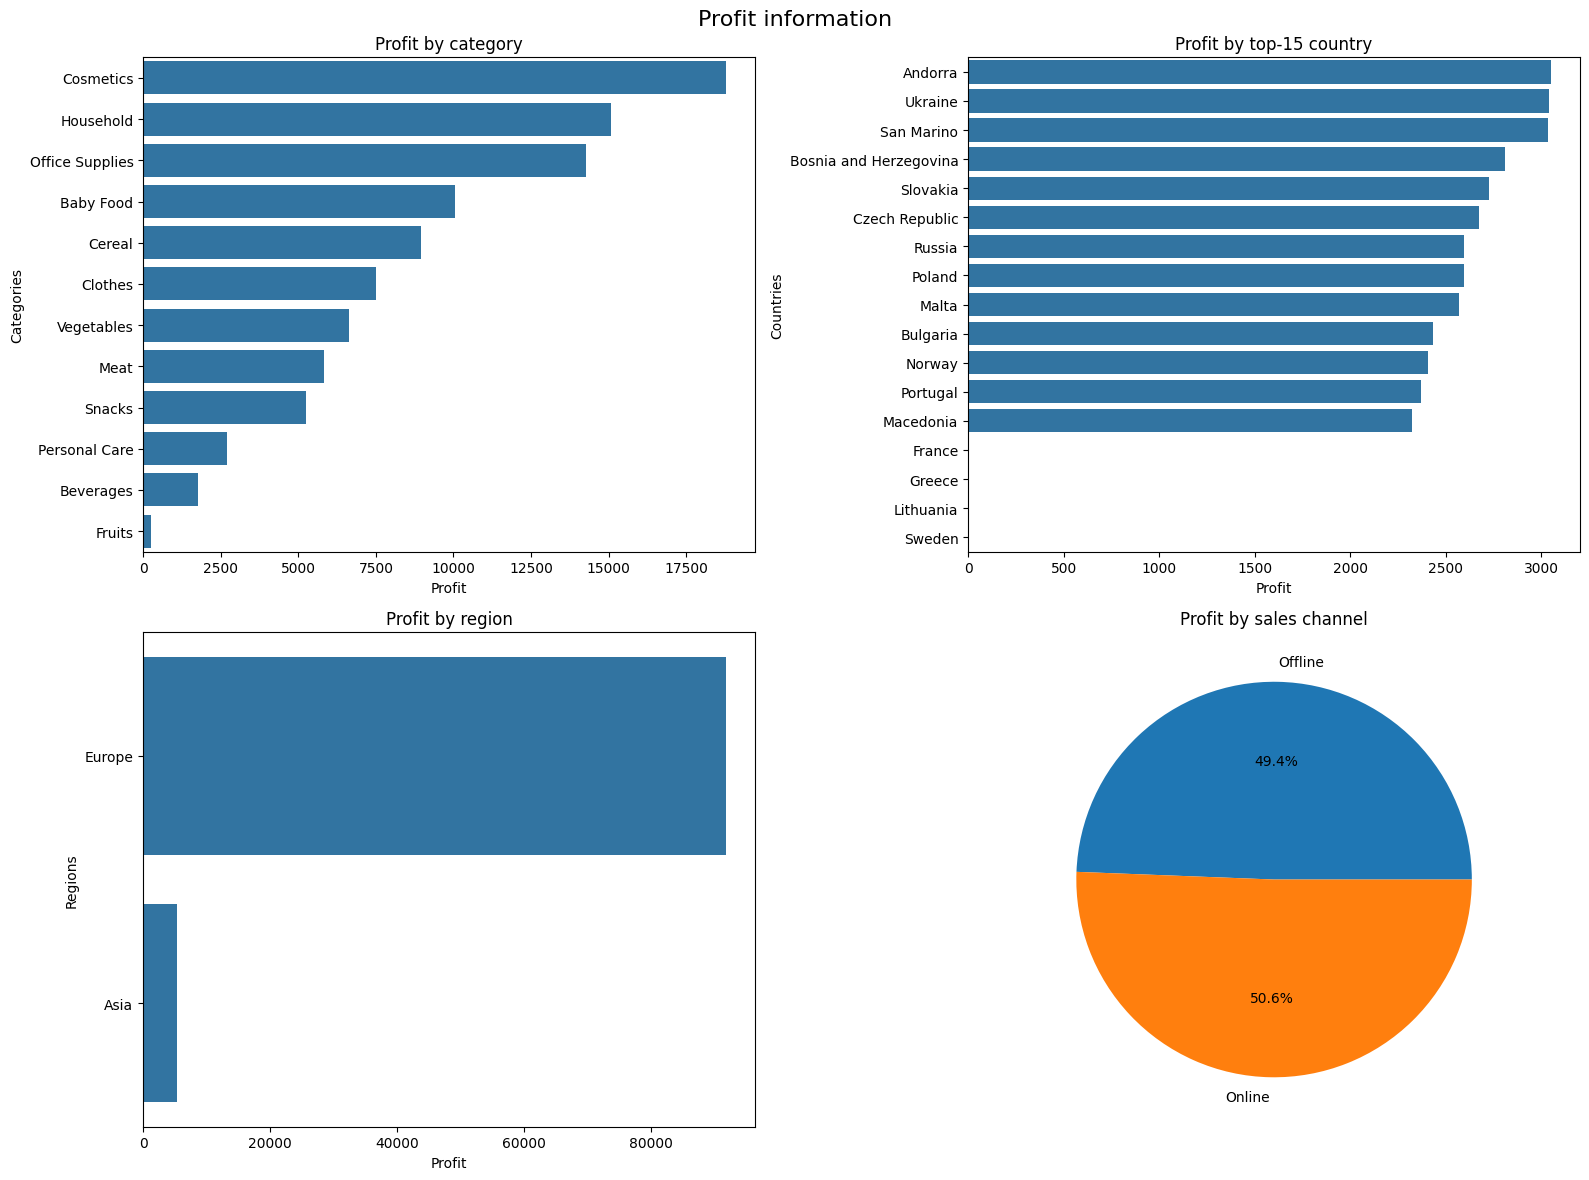

In [13]:
#Info for profit graphics
profit_by_category = (revenue_by_category - cost_by_category).sort_values(ascending=False)
profit_by_country = (revenue_by_country - cost_by_country).sort_values(ascending=False)
profit_by_region = (revenue_by_region - cost_by_region).sort_values(ascending=False)
profit_by_channel = revenue_by_channel - cost_by_channel

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle("Profit information", fontsize=16)

# Profit by category
sns.barplot(ax=axes[0, 0], x=profit_by_category.values, y=profit_by_category.index)
axes[0, 0].set_title("Profit by category")
axes[0, 0].set_xlabel("Profit")
axes[0, 0].set_ylabel("Categories")

# Profit by country
sns.barplot(ax=axes[0, 1], x=profit_by_country.values, y=profit_by_country.index)
axes[0, 1].set_title("Profit by top-15 country")
axes[0, 1].set_xlabel("Profit")
axes[0, 1].set_ylabel("Countries")

# Profit by region
sns.barplot(ax=axes[1, 0], x=profit_by_region.values, y=profit_by_region.index)
axes[1, 0].set_title("Profit by region")
axes[1, 0].set_xlabel("Profit")
axes[1, 0].set_ylabel("Regions")

#Profit by channel
profit_by_channel.plot(kind='pie', ax=axes[1, 1], autopct='%1.1f%%')
axes[1, 1].set_title("Profit by sales channel")
axes[1, 1].set_ylabel("")

plt.tight_layout()
plt.show()

Analysis revealed that 'Cosmetics' emerged as the most profitable product category, despite ranking only fourth in terms of overall cost. This highlights the high-margin nature of this category. 'Household and Office Supplies' secured the second and third positions in terms of profitability. Conversely, 'Personal Care,' 'Beverages,' and 'Fruits' demonstrated the lowest profitability.

The analysis focused on the top 15 revenue-generating countries. Notably, 'Ukraine' consistently ranked within the top three across all relevant metrics. The inclusion of 'Andorra' and 'San Marino' in this top tier is noteworthy. Conversely, 'France,' 'Greece,' 'Lithuania,' and 'Sweden' exhibited the lowest profitability. A key observation was that 'France' and 'Lithuania' demonstrated higher consumption costs than the revenue generated, indicating potential areas for optimization.

A significant disparity was observed between the European and Asian markets, with the European market exhibiting substantial dominance in terms of profit, cost, and revenue.

Finally, the analysis of sales channels revealed a consistent trend. 'Online sales' marginally outperformed 'Offline sales' by 0.9%, suggesting that current marketing strategies effectively balance online and offline channels.

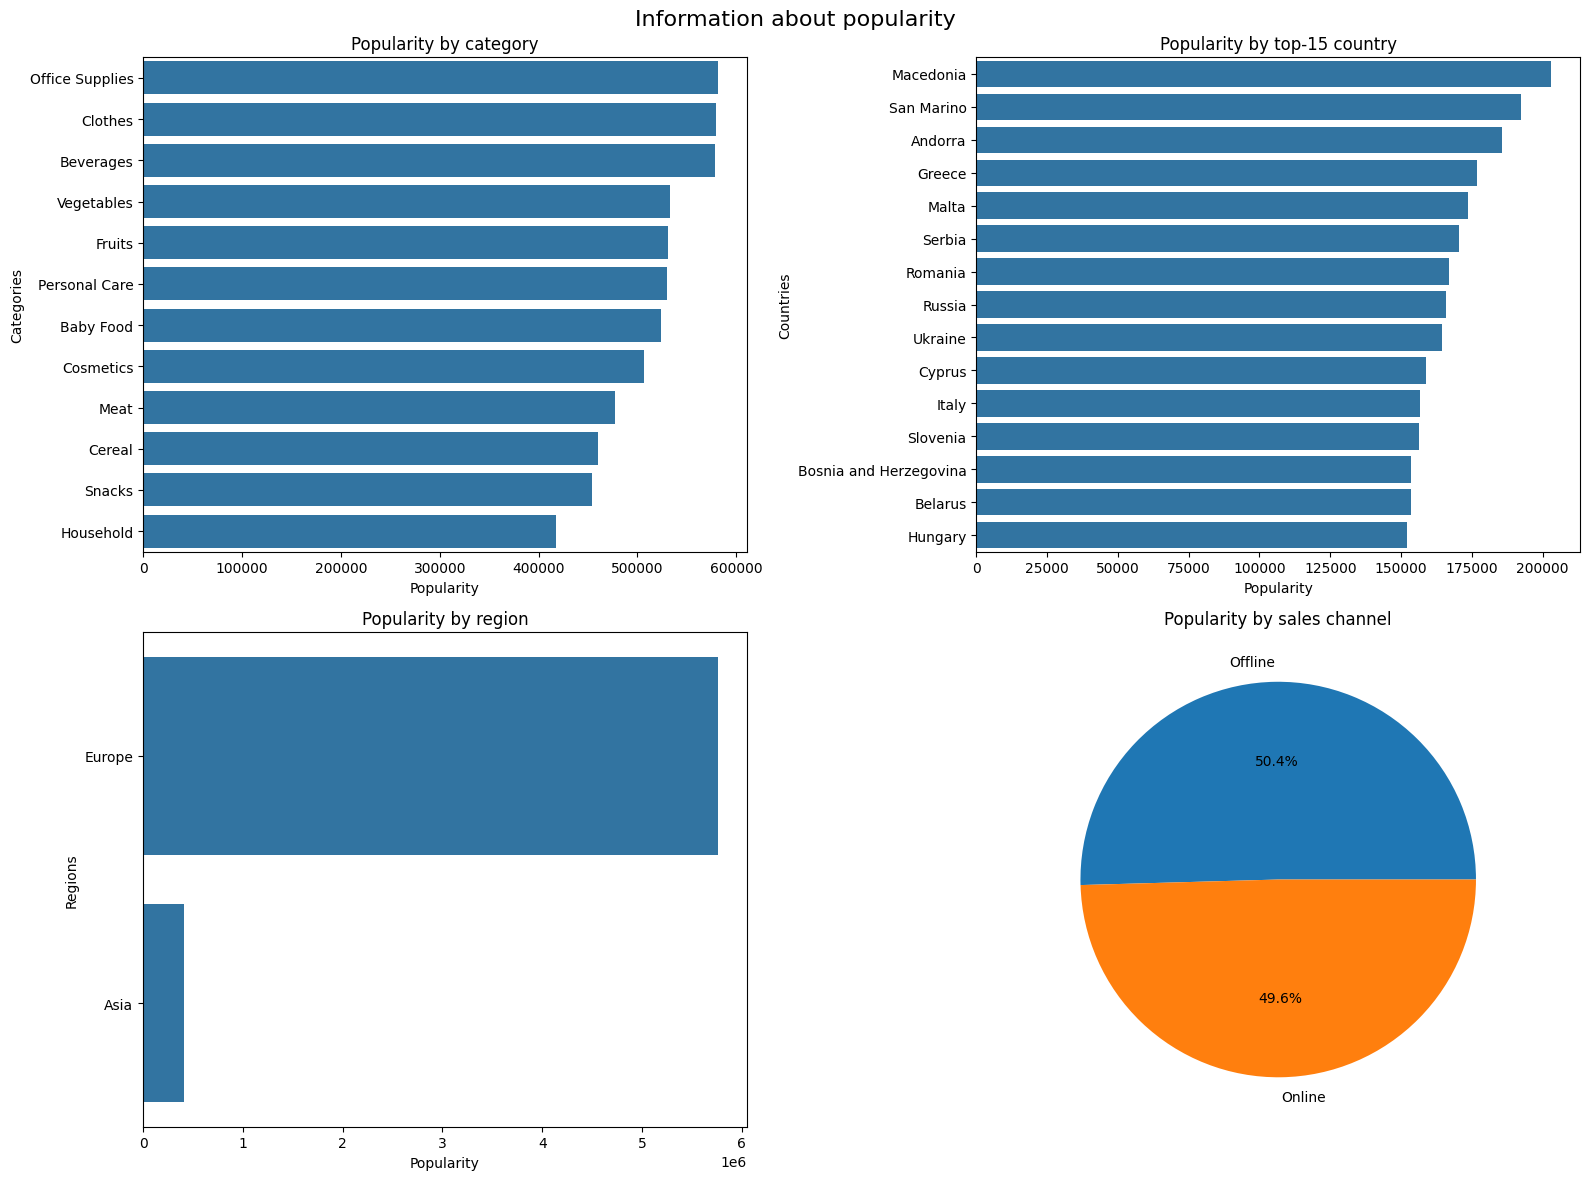

In [14]:
#Aggregating data
popularity_by_category = merged_df.groupby('item_type')['units_sold'].sum().sort_values(ascending=False)
popularity_by_country = merged_df.groupby('country_name')['units_sold'].sum().sort_values(ascending=False).head(15)
popularity_by_region = merged_df.groupby('region')['units_sold'].sum().sort_values(ascending=False)
popularity_by_channel = merged_df.groupby('sales_channel')['units_sold'].sum()

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle("Information about popularity", fontsize=16)

#Popularity by category
sns.barplot(ax=axes[0, 0], x=popularity_by_category.values, y=popularity_by_category.index)
axes[0, 0].set_title("Popularity by category")
axes[0, 0].set_xlabel("Popularity")
axes[0, 0].set_ylabel("Categories")

#Popularity by country
sns.barplot(ax=axes[0, 1], x=popularity_by_country.values, y=popularity_by_country.index)
axes[0, 1].set_title("Popularity by top-15 country")
axes[0, 1].set_xlabel("Popularity")
axes[0, 1].set_ylabel("Countries")

#Popularity by region
sns.barplot(ax=axes[1, 0], x=popularity_by_region.values, y=popularity_by_region.index)
axes[1, 0].set_title("Popularity by region")
axes[1, 0].set_xlabel("Popularity")
axes[1, 0].set_ylabel("Regions")

#Popularity by channel
popularity_by_channel.plot(kind='pie', ax=axes[1, 1], autopct='%1.1f%%')
axes[1, 1].set_title("Popularity by sales channel")
axes[1, 1].set_ylabel("")

plt.tight_layout()
plt.show()

Analysis reveals that "Office Supplies," "Clothes," and "Beverages" are the top three product categories by popularity. Conversely, "Cereal," "Snacks," and "Household" exhibit lower popularity.

Given the strong performance of "Cosmetics," "Household," and "Office Supplies" in terms of profitability, a focused marketing strategy for these categories may yield significant returns.

Macedonia, San Marino, and Andorra emerged as the top three countries in terms of product popularity. In contrast, Bosnia and Herzegovina, Belarus, and Hungary demonstrated lower popularity levels.

Europe demonstrated the highest overall product popularity across all regions.

Finally, the analysis of sales channels revealed consistent popularity across both online and offline channels.

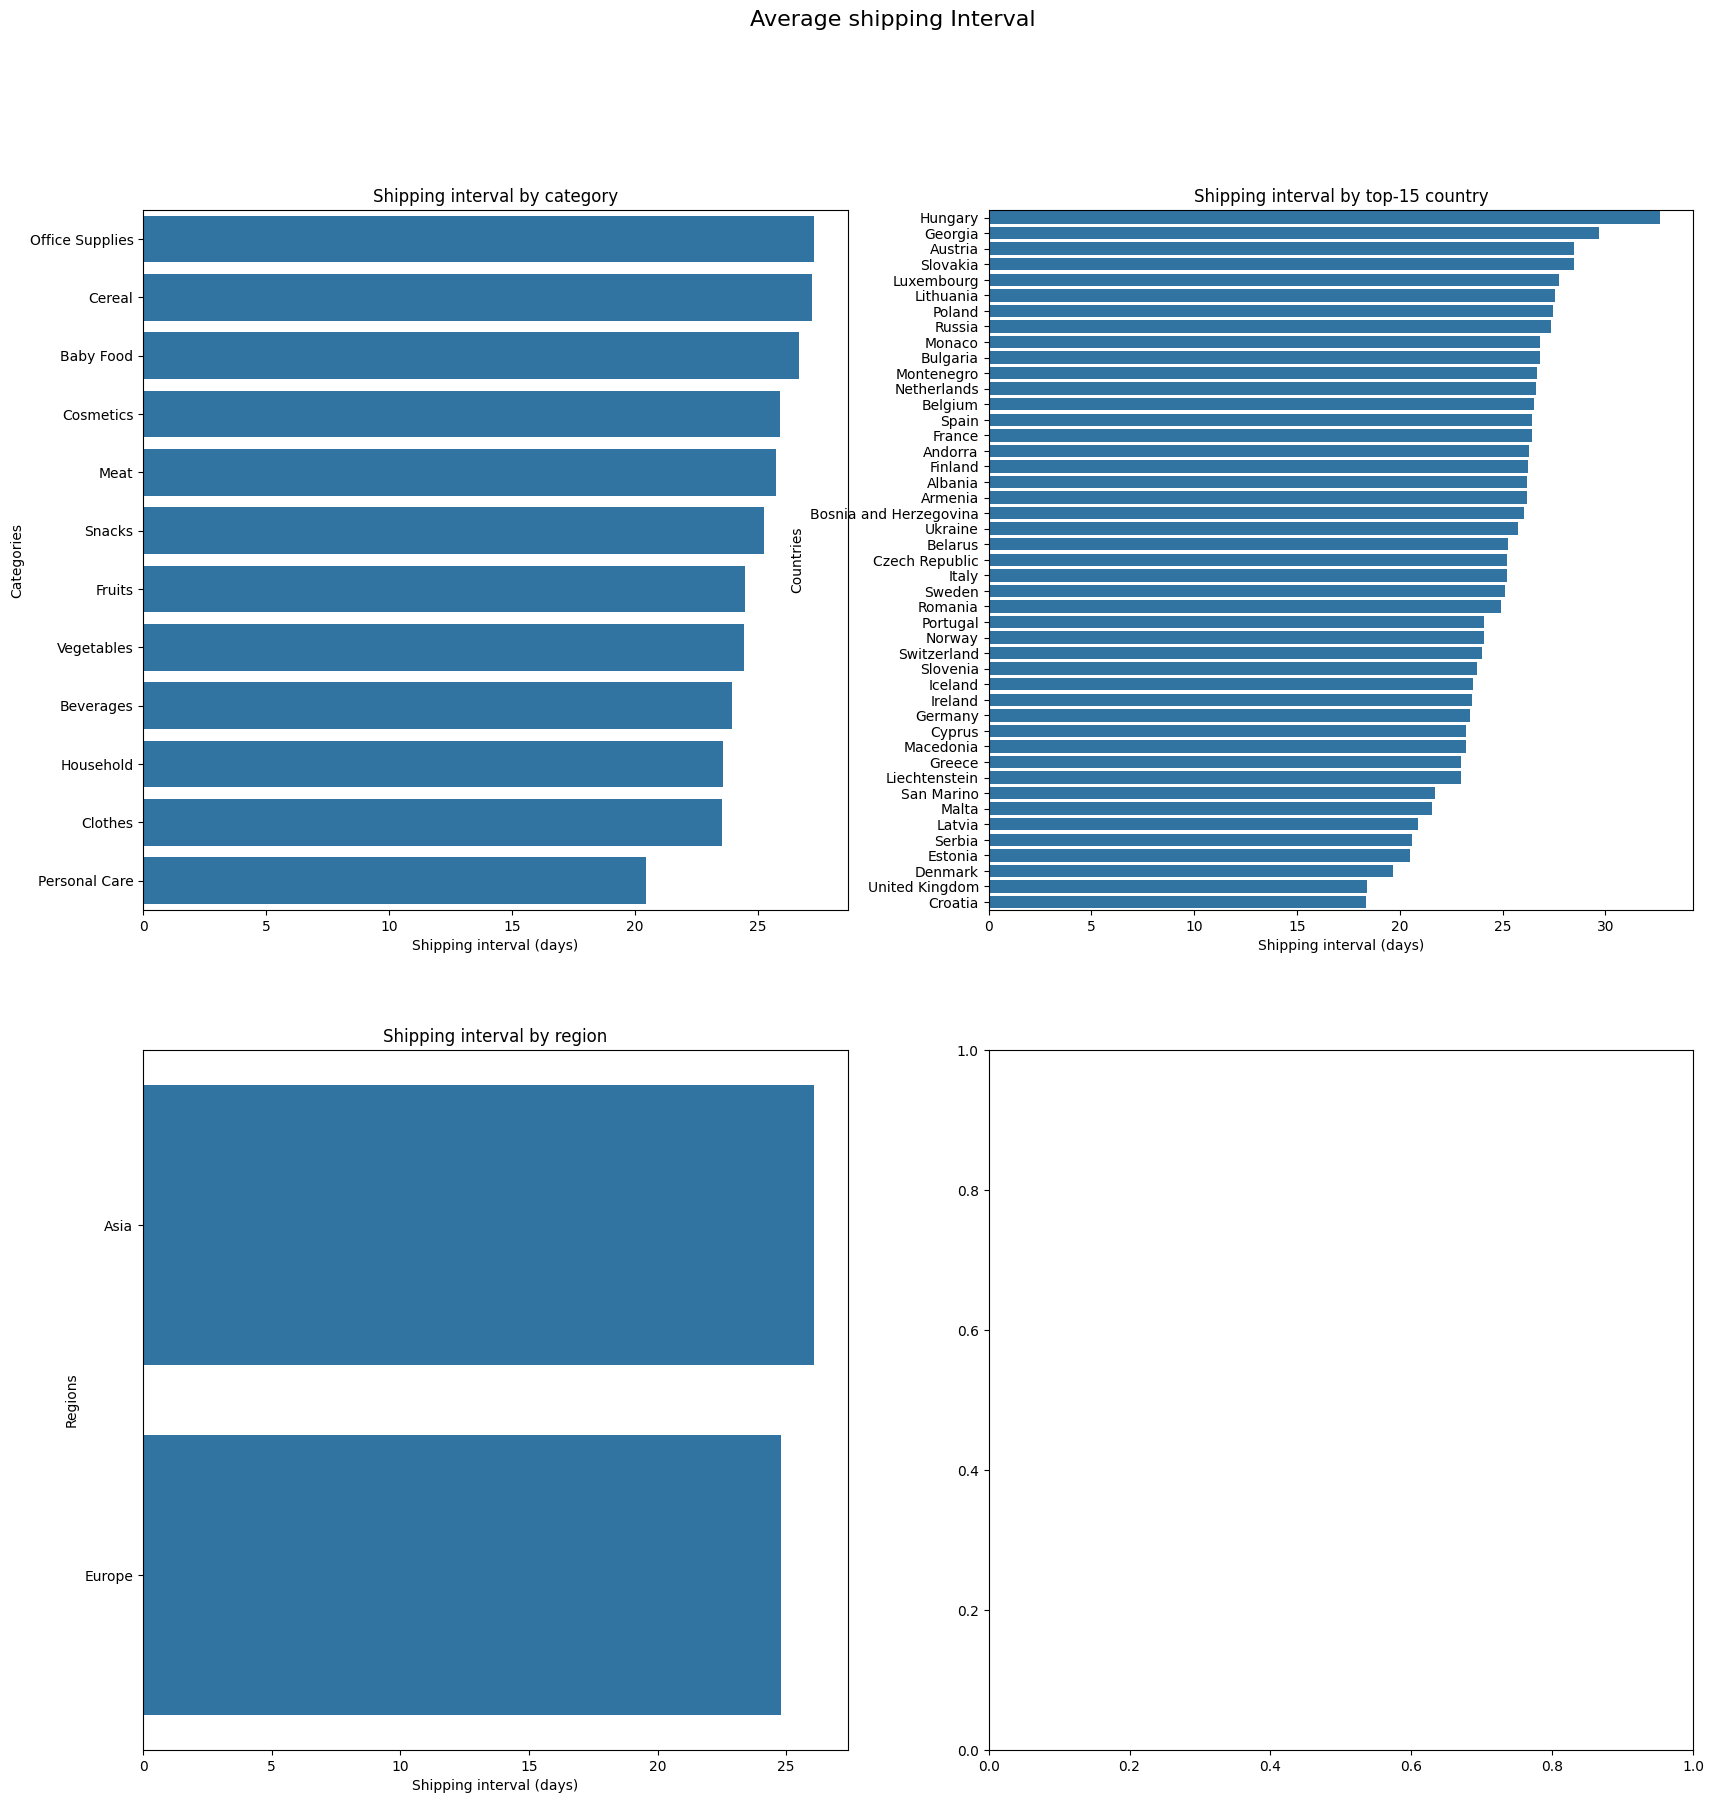

In [15]:
merged_df['shipping_interval'] = merged_df['ship_date'] - merged_df['order_date']
merged_df['shipping_interval'] = merged_df['shipping_interval'].dt.days

#Fiding shipping interval
shipping_interval_by_category = merged_df.groupby('item_type')['shipping_interval'].mean().sort_values(ascending=False)
shipping_interval_by_country = merged_df.groupby('country_name')['shipping_interval'].mean().sort_values(ascending=False)
shipping_interval_by_region = merged_df.groupby('region')['shipping_interval'].mean().sort_values(ascending=False)

fig, axes = plt.subplots(2, 2, figsize=(20, 20))
fig.suptitle("Average shipping Interval", fontsize=16)

#Barplot with category
sns.barplot(ax=axes[0, 0], x=shipping_interval_by_category.values, y=shipping_interval_by_category.index)
axes[0, 0].set_title("Shipping interval by category")
axes[0, 0].set_xlabel("Shipping interval (days)")
axes[0, 0].set_ylabel("Categories")

#Barplot with country
sns.barplot(ax=axes[0, 1], x=shipping_interval_by_country.values, y=shipping_interval_by_country.index)
axes[0, 1].set_title("Shipping interval by top-15 country")
axes[0, 1].set_xlabel("Shipping interval (days)")
axes[0, 1].set_ylabel("Countries")

#Barplot with region
sns.barplot(ax=axes[1, 0], x=shipping_interval_by_region.values, y=shipping_interval_by_region.index)
axes[1, 0].set_title("Shipping interval by region")
axes[1, 0].set_xlabel("Shipping interval (days)")
axes[1, 0].set_ylabel("Regions")

plt.show()

The analysis revealed that "Office Supplies," "Cereal," and "Baby Food" exhibit the longest shipping intervals, reaching up to 25 days. In contrast, "Personal Care" demonstrated the fastest shipping times, ranging from 20-22 days.

Shipping times were found to be longest in Hungary, Georgia, and Austria. Optimizing logistics in these countries to reduce shipping times could significantly enhance customer satisfaction, potentially leading to increased buyer interest and ultimately boosting sales and profits. Conversely, the United Kingdom and Croatia exhibited the shortest shipping intervals.

While shipping intervals in Europe and Asia exhibited minor differences, with Asia generally requiring a slightly longer delivery time, a primary focus on reducing shipping times within the European market, where the majority of business operations likely occur, could yield significant improvements in customer experience and overall business performance.

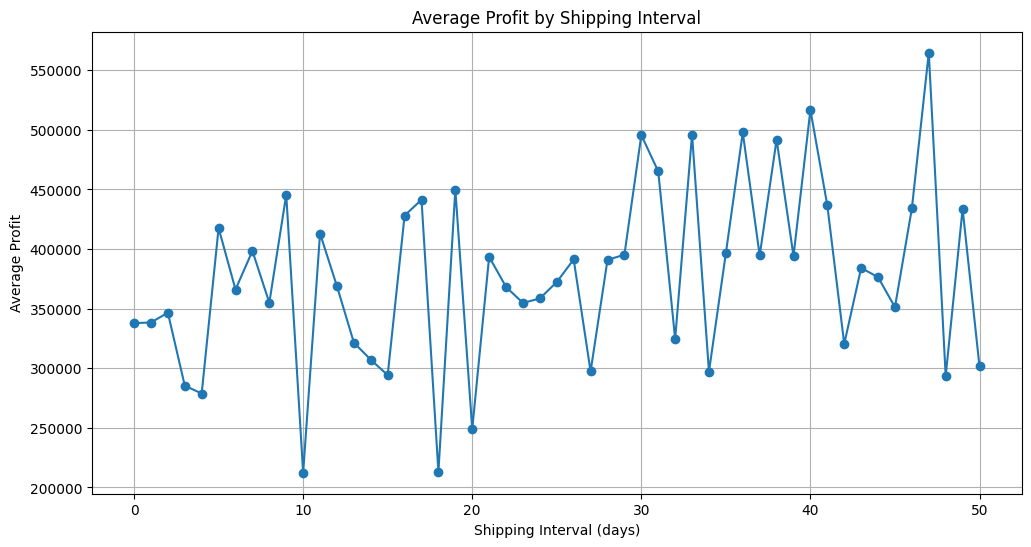

In [16]:
#Aggragation by average profit
avg_profit_by_shipping_time = merged_df.groupby('shipping_interval')['profit'].mean().reset_index()

#Creating lineplot
plt.figure(figsize=(12, 6))
plt.plot(avg_profit_by_shipping_time['shipping_interval'], avg_profit_by_shipping_time['profit'], marker='o')
plt.xlabel('Shipping Interval (days)')
plt.ylabel('Average Profit')
plt.title('Average Profit by Shipping Interval')
plt.grid(True)
plt.show()


The graph shows the dependence of profit on the time of shipment. The longer the delivery time, the more profit the company receives. Such a dependence can occur in the case of delivery of a large number of products, which affects the time of order fulfillment. The least profitable are orders that take 10-20 days to ship.
It is worth examining the order volumes for a more accurate analysis of the graph.

##Dynamic of sales

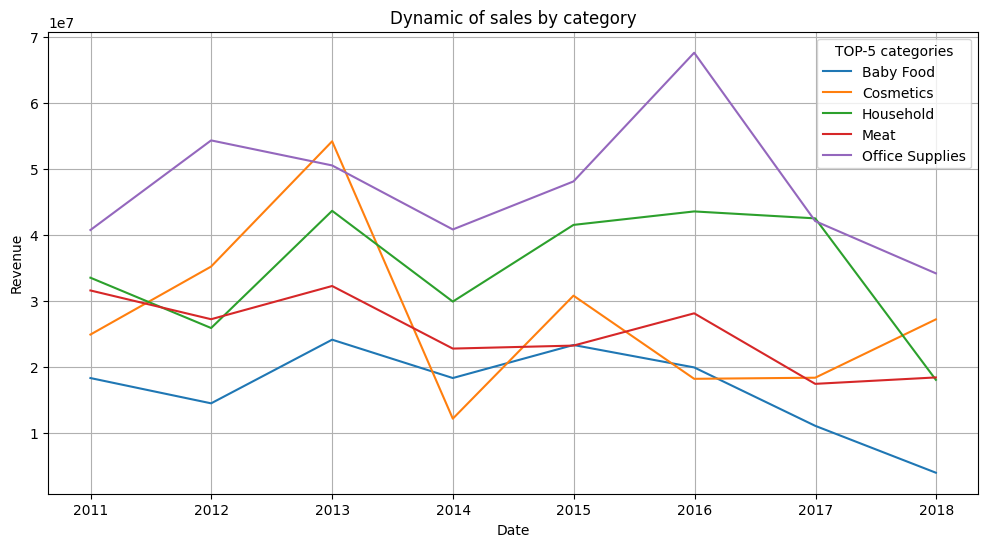

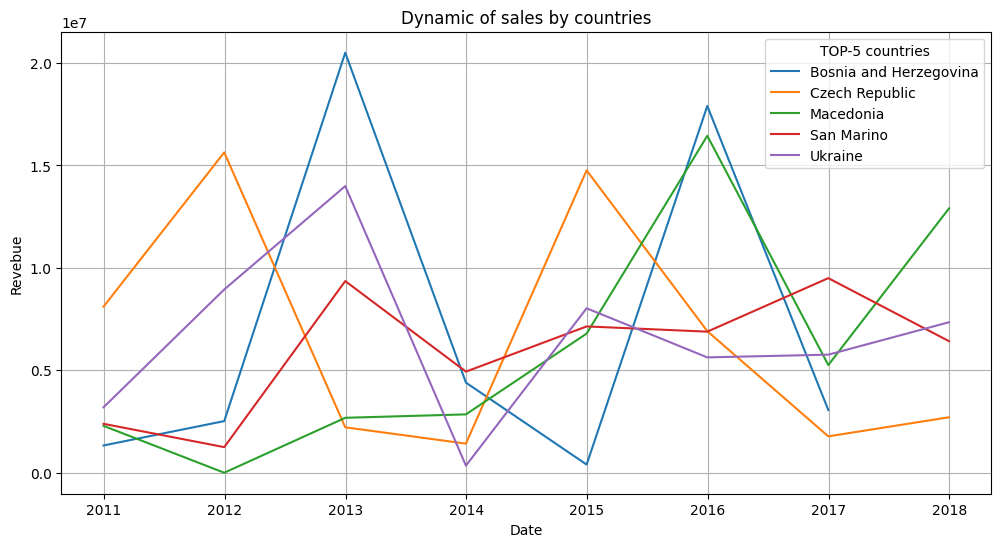

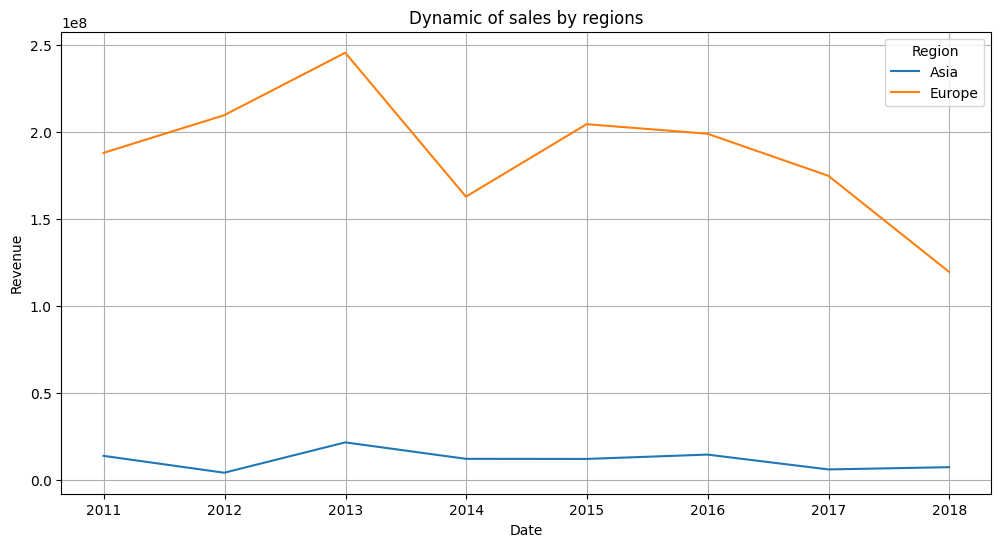

In [17]:
merged_df['Year-Month'] = merged_df['order_date'].dt.to_period('M').dt.to_timestamp()
top_categories = merged_df.groupby('item_type')['revenue'].sum().sort_values(ascending=False).head(5).index.tolist()
top_countries = merged_df.groupby('country_name')['revenue'].sum().sort_values(ascending=False).head(5).index.tolist()

#Filtering data
filtered_categories = merged_df[merged_df['item_type'].isin(top_categories)]
filtered_countries = merged_df[merged_df['country_name'].isin(top_countries)]

#Creating line plot for categories
time_series_category = (filtered_categories.set_index('Year-Month').groupby('item_type')['revenue'].resample('YE').sum().reset_index())
plt.figure(figsize=(12, 6))
sns.lineplot(data=time_series_category, x='Year-Month', y='revenue', hue='item_type')
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.title('Dynamic of sales by category')
plt.legend(title='TOP-5 categories')
plt.grid(True)
plt.show()

#Creating line plot for countries
time_series_country = (filtered_countries.set_index('Year-Month').groupby('country_name')['revenue'].resample('YE').sum().reset_index())
plt.figure(figsize=(12, 6))
sns.lineplot(data=time_series_country, x='Year-Month', y='revenue', hue='country_name')
plt.xlabel('Date')
plt.ylabel('Revebue')
plt.title('Dynamic of sales by countries')
plt.legend(title='TOP-5 countries')
plt.grid(True)
plt.show()

#Creating line plot for regions
time_series_region = (merged_df.set_index('Year-Month').groupby('region')['revenue'].resample('YE').sum().reset_index())
plt.figure(figsize=(12, 6))
sns.lineplot(data=time_series_region, x='Year-Month', y='revenue', hue='region')
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.title('Dynamic of sales by regions')
plt.legend(title='Region')
plt.grid(True)
plt.show()


1. Product Category Analysis

- Office Supplies emerged as the most profitable category, while "Baby Food" demonstrated the lowest profitability.
- A significant seasonal increase in sales across all product groups was observed in 2013, with "Cosmetics" experiencing a peak in that year.
- A sharp decline in sales occurred across all product groups in 2014, particularly impacting "Cosmetics" with a dramatic drop in sales rank.
- Following 2014, a gradual increase in sales was observed for most product groups, with the exception of "Baby Food."
- "Office Products" experienced its peak sales volume in 2016.
- "Cosmetics" is the only product category that has consistently demonstrated a growing sales trend since 2014.
- The observed fluctuations in sales across different years suggest potential influences from marketing campaigns or external factors.
2. Country-Level Analysis

- The Czech Republic exhibited peak sales in 2012 and 2015, followed by a significant decline.
- In 2013, sales experienced rapid growth in countries like Bosnia and Herzegovina, Ukraine, and San Marino.
- Macedonia reached its peak sales volume in 2016.
- A general decreasing trend in sales is evident across most countries in recent years.
- A notable correlation exists between the sales trends of different countries and product categories, with synchronized periods of growth and decline observed across both dimensions.
- San Marino demonstrated the most stable sales performance among the analyzed countries.
3. Regional Analysis

- The European region achieved peak sales in 2013, followed by a consistent downward trend.
- Sales in the Asian region remained relatively stable, fluctuating around an average level of 0.5.
- A strong correlation is observed between the peak sales year in the European region (2013) and the peak sales years for various countries and product categories.
4. Overall Observations

- The analysis reveals significant fluctuations in sales across different years, product categories, and countries.
- Identifying the factors driving these fluctuations (e.g., marketing campaigns, economic conditions, competitor activity) is crucial for informed business decisions.
- Further analysis is required to understand the reasons for the observed trends and to develop effective strategies for mitigating potential risks and capitalizing on growth opportunities.

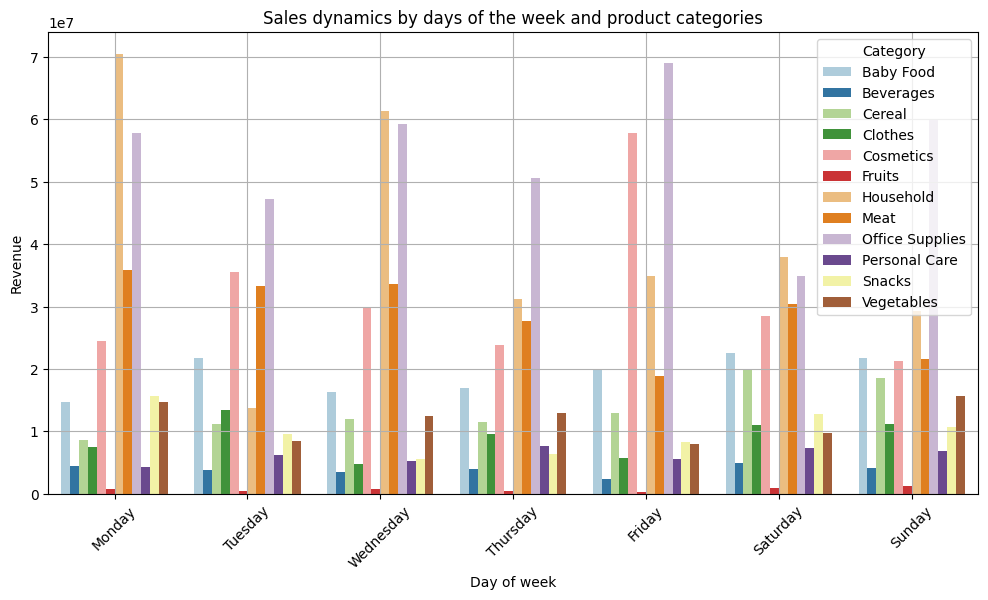

In [18]:
merged_df['day_of_week'] = merged_df['order_date'].dt.day_name()


grouped_data_days = merged_df.groupby(['day_of_week', 'item_type'])['revenue'].sum().reset_index()
grouped_data_days['day_of_week'] = pd.Categorical(grouped_data_days['day_of_week'], categories=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], ordered=True)

#Creating barplot for sales of each category and day of week
plt.figure(figsize=(12, 6))
sns.barplot(data=grouped_data_days, x='day_of_week', y='revenue', hue='item_type', palette='Paired')
plt.xlabel('Day of week')
plt.ylabel('Revenue')
plt.title('Sales dynamics by days of the week and product categories')
plt.xticks(rotation=45)
plt.legend(title='Category')
plt.grid(True)
plt.show()

Analysis reveals distinct day-of-week seasonality patterns across product categories.

- Cosmetics: Exhibit peak sales on Fridays, likely attributed to increased self-care activities before the weekend.
- Household: Show higher sales on Mondays and Wednesdays, potentially reflecting increased household cleaning and maintenance activities during weekdays.
- Cereal: Despite lower overall sales volumes, demonstrate peak demand on weekends, suggesting increased consumption during breakfast and leisure time.
- Office Supplies: Experience a sales peak on Fridays, possibly driven by weekend preparation and stock-up for the upcoming workweek. Notably, "Office Supplies" maintain relatively high sales throughout the week, with a slight dip on Saturdays.

These observed patterns provide valuable insights for optimizing inventory management, staffing schedules, and potential targeted marketing campaigns for each product category.

##Conclusion

This analysis highlights the need for further investigation into the profitability of product categories such as "Personal Care," "Beverages," and "Fruits," which demonstrate high popularity despite low profitability margins. A more detailed profitability analysis for these categories is recommended to inform further business decisions.

Conversely, "Household Goods" and "Cosmetics" exhibit high profitability. Implementing targeted marketing strategies to further increase popularity and order volume within these categories presents a significant opportunity for revenue growth.

A thorough investigation into the observed shipping times is warranted. While the analysis indicates comparable shipping intervals between Asia and Europe, further research is necessary to understand this phenomenon. Factors such as the location of warehouses undoubtedly play a crucial role. However, if warehouses are primarily located in Europe, the extended delivery times to Asia require further investigation. Similarly, identifying the root causes of the relatively long shipping times within Europe is crucial for optimizing logistics and improving customer satisfaction.